SHUBHAM BHARDWAJ   TASK 1 Linear Regression
Predicting the score of a student on the basis of study hours. 

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [89]:
df.shape
#very small df

(25, 2)

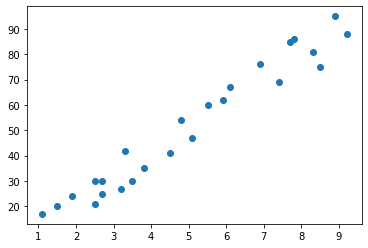

In [6]:
#basic EDA

plt.scatter(df['Hours'],df['Scores'])

In [ ]:
#strong rpositive relation

<AxesSubplot:>

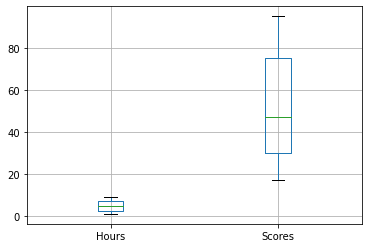

In [8]:
df.boxplot()

In [ ]:
#no outies

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

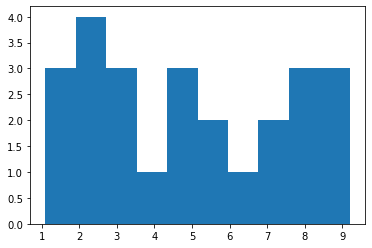

In [13]:
plt.hist(df['Hours'])

In [18]:
df.Hours.skew()

0.1903382010052985

In [ ]:
#data quite normal.

In [ ]:
#scalling is not required as only 1 ind variable is there.

In [21]:
X= df['Hours']
y= df['Scores']
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
len(y_train)/len(df)
#validation hence our split is ok

0.68

In [28]:
#model building

import statsmodels.api as sm

In [29]:
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
X.head()

,const,Hours
0,1.0,2.5
1,1.0,5.1
2,1.0,3.2
3,1.0,8.5
4,1.0,3.5


In [32]:
mod = sm.OLS(y_train,X_train).fit()

In [33]:
mod.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2389.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                    7.56e-19
Time:                        21:21:47   Log-Likelihood:                         -50.047
No. Observations:                  17   AIC:                                      102.1
Df Residuals:                      16   BIC:                                      102.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1644      0.208     48.876      0.000       9.724      10.605
==============================================================================
Omnibus:                       12.638   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                2.165
Skew:                           0.177   Prob(JB):                        0.339
Kurtosis:                       1.288   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 == 0.993 damnnnn, lets check for overfitting

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
pred_t = mod.predict(X_train)

In [37]:
rmse1 = np.sqrt(mean_squared_error(pred_t,y_train))
rmse1

4.595229899886939

In [38]:
pred_test = mod.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(pred_test,y_test))
rmse2

7.012352802290412

In [ ]:
#model is overfit.

In [75]:
#lets try to reduce the overfit and Error.
from sklearn.linear_model import ElasticNet

In [76]:
es = ElasticNet()

In [104]:
mod_es = es.fit(X_train,y_train)

In [88]:
pred_es_tr = mod_es.predict(X_train)
rmse3 = np.sqrt(mean_squared_error(pred_es_tr,y_train))
rmse3

5.042943522197925

In [87]:
pred_es_test = mod_es.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(pred_es_test,y_test))
rmse4

6.3141162050754325

In [90]:
from sklearn.model_selection import cross_val_score



In [95]:
cross_val_score(mod_es,X,y,cv=3)

array([0.91589329, 0.94063209, 0.9201819 ])

In [ ]:
#model is performing good for differnt test train splits.

In [ ]:
#lets predict what will be the score of a kid who studies 9.25hrs a day

In [112]:
hours = 9.25
print(mod.predict(hours))

[94.02095341]


In [117]:
#lets print test vs prediction 
#OLS MODEL
df1 = pd.DataFrame(columns=['Actual','Pred'])

In [124]:
df1['Actual']= y_test
df1['Pred']=pred_test

In [125]:
df1

,Actual,Pred
14,17,11.180870
13,42,33.542610
17,24,19.312412
3,75,86.397633
21,54,48.789251
10,85,78.266091
18,67,62.003007
19,69,75.216763


In [121]:
#elastic
df2 = pd.DataFrame(columns=['Actual','Pred'])


In [123]:
df2['Actual']= y_test
df2['Pred']=pred_es_test

In [126]:
df2

,Actual,Pred
14,17,13.439721
13,42,34.353922
17,24,21.044885
3,75,83.787489
21,54,48.613605
10,85,76.182325
18,67,60.971996
19,69,73.330388
